### **The state space consists of 3 values- total sum of the players cards, the card shown by the dealer(ace-10), does the player have a usable ace(0,1).**
### **We have two actions- HIT and STICK.**
### **Reward for winning=+1** 
### **Reward for losing=-1**
### **Reward for drawing=0**
### **Every game of blackjack is taken to be an episodic, finite MDP, without any discount(gamma=1)**

In [28]:
import gym
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from mpl_toolkits.mplot3d import Axes3D
from functools import partial
%matplotlib inline
plt.style.use('ggplot')

In [6]:
env=gym.make('Blackjack-v1')
when_to_stick=19

#Our policy recieves the state observations,and acts quite simply, it hits untill it reaches 20,21 or 19.Here, we take it to be 19
def the_policy(observation):
    score,dealer_score,usable_ace=observation
    return 0 if score >= when_to_stick else 1

In [7]:
#For our first-visit MC predictions, we need to generate states with respect to the policy we have previously defined.
def generate_ep(policy,env):
    states,actions,rewards=[],[],[]
    
    observation=env.reset()
    
    while True:
        states.append(observation)
        action=the_ploicy(observation)
        actions.append(action)
        observation, reward, done, info = env.step(action)#move on to the next state as per the action taken
        rewards.append(reward)
        if done:
            break
    return states,action,rewards

In [25]:
def fvmc_prediction(policy,env,n_episodes):
    value_table = defaultdict(float) #empty dictionaries to store state values
    N = defaultdict(int)
    for i in range(n_episodes):
        states, _, rewards=generate_ep(policy,env)
        returns=0
        for j in range(len(states)-1,-1,-1):
            R=rewards[j]
            S=states[j]
            returns += R
            
            if S not in states[:j]: #checking if state has reapperaed in state list
                N[S]+=1
                value_table[S] += (returns - value_table[S]) / N[S] #standard incremental update in MC methods
    return value_table
                


   

In [39]:
value= fvmc_prediction(the_policy,env,n_episodes=10000)
for i in range(15):
    print(value.popitem()) #we can observe 10 random states

((4, 3, False), -1.0)
((4, 1, False), 1.0)
((4, 5, False), -1.0)
((14, 1, True), 2.7755575615628914e-17)
((15, 5, True), -0.24999999999999997)
((12, 9, True), -1.0)
((4, 8, False), 0.5)
((12, 5, True), -0.6)
((12, 4, True), 0.5)
((15, 1, True), -0.14285714285714285)
((6, 1, False), -0.3076923076923077)
((16, 4, True), -0.19999999999999998)
((5, 6, False), -0.6363636363636365)
((19, 6, True), 0.2105263157894737)
((16, 1, True), -0.5)


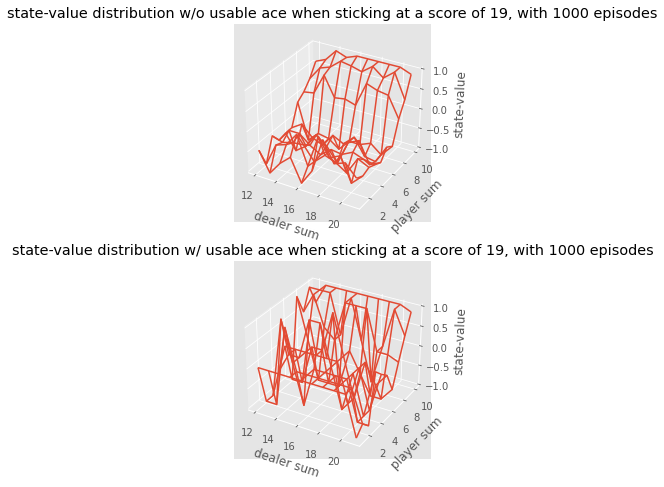

In [36]:
def plot_blackjack(V, ax1, ax2):
    player_sum = np.arange(12, 21 + 1)
    dealer_show = np.arange(1, 10 + 1)         
    usable_ace = np.array([False, True])
    state_values = np.zeros((len(player_sum), len(dealer_show), len(usable_ace)))
    for i, player in enumerate(player_sum):
        for j, dealer in enumerate(dealer_show):
            for k, ace in enumerate(usable_ace):
                state_values[i, j, k] = V[player, dealer, ace]
    X, Y = np.meshgrid(player_sum, dealer_show)
    ax1.plot_wireframe(X, Y, state_values[:, :, 0])   
    ax2.plot_wireframe(X, Y, state_values[:, :, 1])
    for ax in ax1, ax2:    
        ax.set_zlim(-1, 1)
        ax.set_ylabel('player sum')
        ax.set_xlabel('dealer sum')
        ax.set_zlabel('state-value')
fig, axes = plt.subplots(nrows=2, figsize=(5, 8),subplot_kw={'projection': '3d'})
axes[0].set_title('state-value distribution w/o usable ace when sticking at a score of 19, with 1000 episodes')
axes[1].set_title('state-value distribution w/ usable ace when sticking at a score of 19, with 1000 episodes')
plot_blackjack(value, axes[0], axes[1])

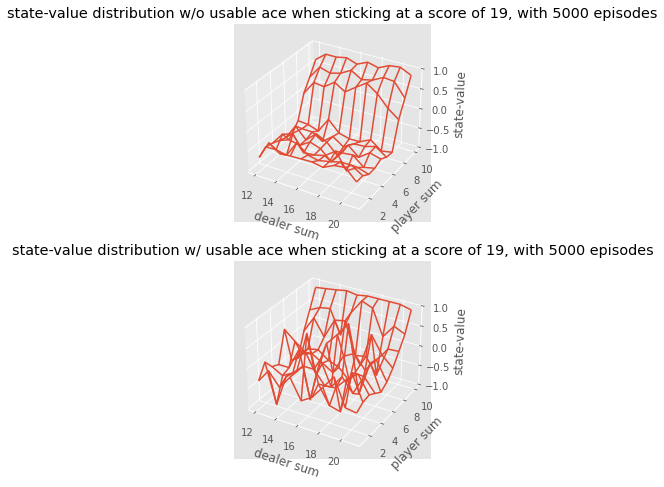

In [38]:
fig, axes = plt.subplots(nrows=2, figsize=(5, 8),subplot_kw={'projection': '3d'})
axes[0].set_title('state-value distribution w/o usable ace when sticking at a score of 19, with 5000 episodes')
axes[1].set_title('state-value distribution w/ usable ace when sticking at a score of 19, with 5000 episodes')
plot_blackjack(value, axes[0], axes[1])

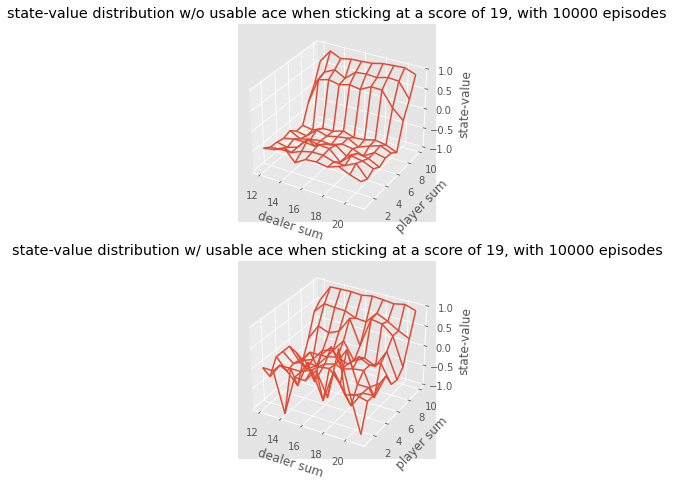

In [40]:
fig, axes = plt.subplots(nrows=2, figsize=(5, 8),subplot_kw={'projection': '3d'})
axes[0].set_title('state-value distribution w/o usable ace when sticking at a score of 19, with 10000 episodes')
axes[1].set_title('state-value distribution w/ usable ace when sticking at a score of 19, with 10000 episodes')
plot_blackjack(value, axes[0], axes[1])

Increasing the no.of episodes, we are able to produce more smooth and more effective values for our states. The plot that takes a usable ace remains more jagged as the probability to be dealt a usable ace is quite low, and our method is unable to effectively pinpoint states.